# Population Growth Estimates

## Objective 

Provide an introductory analysis into the growth rates within Senegal due to migration trends.

> [Senegal](http://en.wikipedia.org/wiki/Senegal) has a population of over 13.5 million,[36] about 42 percent of whom live in rural areas. Density in these areas varies from about 77 inhabitants per square kilometre (200/sq mi) in the west-central region to 2 per square kilometre (5.2/sq mi) in the arid eastern section.

## Data Access

### Available Data
The [2012 Revision of the World Population Prospects](http://esa.un.org/unpd/wpp/unpp/panel_indicators.htm) provides global demographic estimates and projections. This data is publicly available by the Population Division of the United Nations Department of Economic and Social Affairs of the United Nations Secretariat. The world population prospects are used widely throughout the United Nations and by many international organizations, research centers, academic researchers and the media.

### Load Data
Use the [UN World Population Prospects Service](http://esa.un.org/unpd/wpp/unpp/panel_indicators.htm) to download a csv file. We are initially interested in a data file for Senegal with the following variables:

* population growth rate
* net migration rate
* net migration

Once you've downloaded the data, upload it to your workbench.

<div class="alert" style="border: 1px solid #aaa; background: radial-gradient(ellipse at center, #ffffff 50%, #eee 100%);">
<div class="row">
    <div class="col-sm-1"><img src="https://knowledgeanyhow.org/static/images/favicon_32x32.png" style="margin-top: -6px"/></div>
    <div class="col-sm-11">In IBM Knowledge Anyhow Workbench, you can drag/drop the file on your workbench browser tab to simplify the uploading process.</div>
</div>

## Data Exploration

Import the data into a dataframe so you can easily explore it.

In [2]:
import pandas as pd
df_pop_density = pd.read_csv('/resources/senegal_growth_migration.csv')
df_pop_density.head(5)

,Country,Variable,Variant,Year,Value
0,Senegal,Population growth rate (%),Medium variant,1950-1955,2.33
1,Senegal,Population growth rate (%),Medium variant,1955-1960,2.66
2,Senegal,Population growth rate (%),Medium variant,1960-1965,2.77
3,Senegal,Population growth rate (%),Medium variant,1965-1970,2.90
4,Senegal,Population growth rate (%),Medium variant,1970-1975,3.00


We are not interested in the ```Variant``` field and we know our data is limited to the country of ```Senegal```. So let us filter the data.

In [3]:
filtered_df = df_pop_density[['Variable','Year','Value']].dropna(how="any")
filtered_df

,Variable,Year,Value
0,Population growth rate (%),1950-1955,2.33
1,Population growth rate (%),1955-1960,2.66
2,Population growth rate (%),1960-1965,2.77
3,Population growth rate (%),1965-1970,2.90
4,Population growth rate (%),1970-1975,3.00
5,Population growth rate (%),1975-1980,2.56
6,Population growth rate (%),1980-1985,2.90
7,Population growth rate (%),1985-1990,3.09
8,Population growth rate (%),1990-1995,2.96
9,Population growth rate (%),1995-2000,2.48


That's more concise but let's create a pivot table from it so it's even easier to read.

In [4]:
df_pivot = filtered_df.pivot_table('Value', 'Year', 'Variable')
df_pivot.head(5)

Variable,"Net migration (per year), both sexes combined (thousands)","Net migration rate (per 1,000 population)",Population growth rate (%)
Year,,,
1950-1955,7,2.5,2.33
1955-1960,9,3.0,2.66
1960-1965,10,2.9,2.77
1965-1970,17,4.4,2.90
1970-1975,13,2.9,3.00


Now we can plot the data.

In [5]:
%matplotlib inline

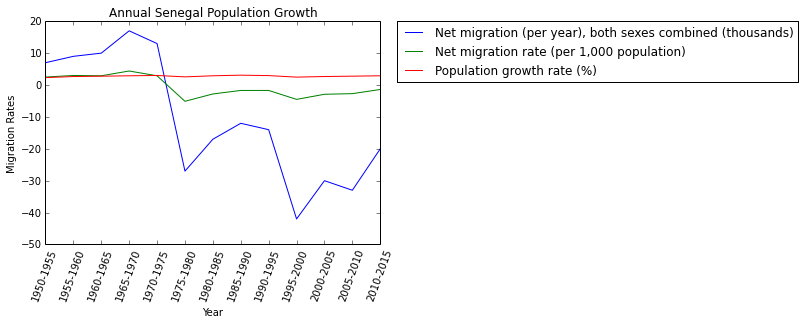

In [62]:
import numpy as np
plt.figure(figsize = (6,4), dpi = 72)
plt.plot(df_pivot.ix[:,0:1], label="Net migration (per year), both sexes combined (thousands)")
plt.plot(df_pivot.ix[:,1:2], label="Net migration rate (per 1,000 population)")
plt.plot(df_pivot.ix[:,2:3], label="Population growth rate (%)")
plt.xlabel('Year')
plt.ylabel('Migration Rates')
plt.title('Annual Senegal Population Growth')
xvalues = list(df_pivot.index)
x = np.array(range(0,len(xvalues)))
plt.xticks(x,xvalues, rotation=70)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## References

* [Demographics of Senegal](http://en.wikipedia.org/wiki/Demographics_of_Senegal)
* [United Nations World Population Prospects](http://esa.un.org/unpd/wpp/index.htm)

<div class="alert" style="border: 1px solid #aaa; background: radial-gradient(ellipse at center, #ffffff 50%, #eee 100%);">
<div class="row">
    <div class="col-sm-1"><img src="https://knowledgeanyhow.org/static/images/favicon_32x32.png" style="margin-top: -6px"/></div>
    <div class="col-sm-11">This notebook was created using [IBM Knowledge Anyhow Workbench](https://knowledgeanyhow.org).  To learn more, visit us at https://knowledgeanyhow.org.</div>
    </div>
</div>